In [78]:
import numpy as np
import matplotlib.pyplot as plt
import requests


In [79]:
url="https://janaf.nist.gov/tables/C-067.txt"
file=requests.get(url)
datos=file.text
datos=datos.split("\n")[3:-1]
mat=[]
for x in datos:
    s=x.split("\t")
    print (s)
    mat.append([float(a) for a in (s)])
mat=np.array(mat)


['100', '33.258', '149.500', '216.485', '-6.698', '-69.644', '-64.353', '33.615']
['200', '33.473', '172.577', '189.418', '-3.368', '-72.027', '-58.161', '15.190']
['250', '34.216', '180.113', '186.829', '-1.679', '-73.426', '-54.536', '11.395']
['298.15', '35.639', '186.251', '186.251', '0.', '-74.873', '-50.768', '8.894']
['300', '35.708', '186.472', '186.252', '0.066', '-74.929', '-50.618', '8.813']
['350', '37.874', '192.131', '186.694', '1.903', '-76.461', '-46.445', '6.932']
['400', '40.500', '197.356', '187.704', '3.861', '-77.969', '-42.054', '5.492']
['450', '43.374', '202.291', '189.053', '5.957', '-79.422', '-37.476', '4.350']
['500', '46.342', '207.014', '190.614', '8.200', '-80.802', '-32.741', '3.420']
['600', '52.227', '215.987', '194.103', '13.130', '-83.308', '-22.887', '1.993']
['700', '57.794', '224.461', '197.840', '18.635', '-85.452', '-12.643', '0.943']
['800', '62.932', '232.518', '201.675', '24.675', '-87.238', '-2.115', '0.138']
['900', '67.601', '240.205', '20

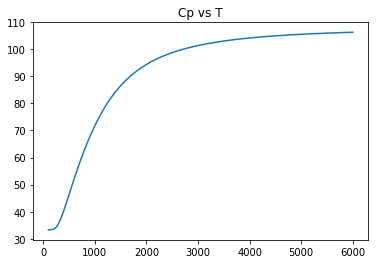

In [80]:
T=mat[:,0]
Cp=mat[:,1]
plt.plot(T,Cp)
plt.title("Cp vs T")
plt.show()

In [81]:
T=T[3:16]
y=Cp[3:16]
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
beta=np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
beta

array([ -0.42317857, 107.50201452, -41.34537789,   5.39384261,
         0.67123974])

In [82]:
Cp_calc=beta.dot(X.T)

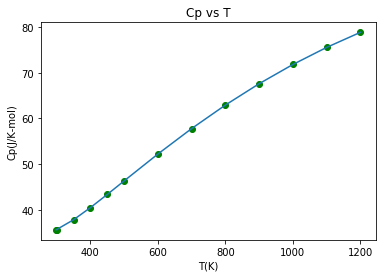

In [83]:
plt.scatter(T,y,color="green")
plt.plot(T,Cp_calc)
plt.xlabel("T(K)")
plt.ylabel("Cp(J/K-mol)")
plt.title("Cp vs T")
plt.show()

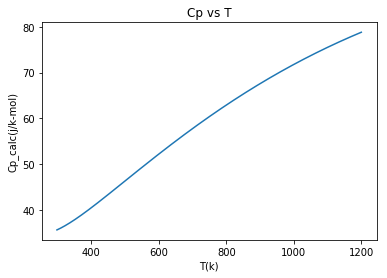

In [84]:
dT=0.1
T=np.arange(298,1200,dT)
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T #esta X va de 0.1 en 0.1 a excepcion de la anterior que iba de 50 en 50
Cp_calc=X.dot(beta)
plt.title("Cp vs T")
plt.ylabel("Cp_calc(j/k-mol)")
plt.xlabel("T(k)")
plt.plot(T,Cp_calc)
plt.show()

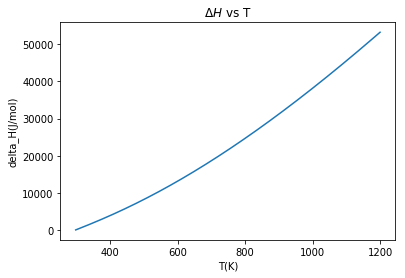

In [95]:
H=np.cumsum(Cp_calc*dT) 
plt.plot(T,H)
plt.xlabel("T(K)")
plt.ylabel("delta_H(J/mol)")
plt.title(r'$\Delta H$ vs T')
plt.show()

In [86]:
print (H)

[3.56421928e+00 7.12877446e+00 1.06936660e+01 ... 5.32569426e+04
 5.32648249e+04 5.32727074e+04]


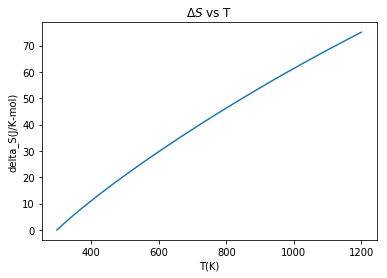

In [94]:
S=np.cumsum(Cp_calc/T*dT)
plt.plot(T,S)
plt.xlabel("T(K)")
plt.ylabel("delta_S(J/K-mol)")
plt.title(r'$\Delta S$ vs T')
plt.show()

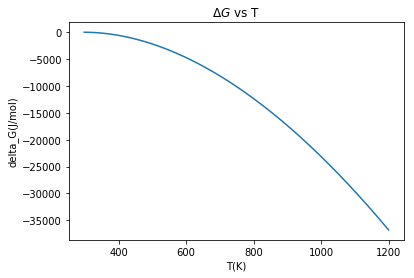

In [93]:
G=H-T*S
plt.plot(T,G)
plt.xlabel("T(K)")
plt.ylabel("delta_G(J/mol)")
plt.title(r'$\Delta G$ vs T')
plt.show()

# Problema Nº2#

In [139]:
#valores para calculo del equilibrio
deltaS_NO2=240.034
deltaH_NO2=33.095*1000
deltaS_NO=210.758
deltaH_NO=90.291*1000
deltaS_O2=205.147
deltaH_O2=0*1000
T=298.15 #temperatura en kelvin 
pt=1.0 #presion total en bar
R=8.314 #J/K-mol

In [140]:
#calcular delta G a partir de los datos que es igual al potencial u
uNO_est=deltaH_NO-T*deltaS_NO
uNO2_est=deltaH_NO2-T*deltaS_NO2
uO2_est=deltaH_O2-T*deltaS_O2
print(uNO_est,uNO2_est,uO2_est)

27453.5023 -38471.13709999999 -61164.57804999999


In [143]:
x=np.arange(0.001,1,0.001)
nt=(3/2)-(1/2)*x
n_NO=1-x
n_NO2=(1/2)-(1/2)*x
n_O2=x
X_NO2=n_NO2/nt
X_NO=n_NO/nt
X_O2=n_O2/nt

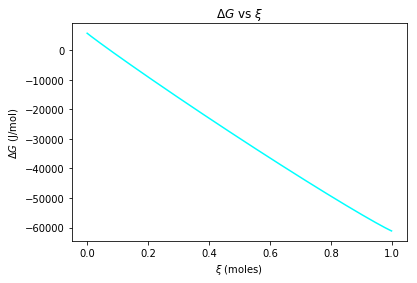

In [151]:
uNO=uNO_est+R*T*np.log(X_NO)
uNO2=uNO2_est+R*T*np.log(X_NO2)
uO2=uO2_est+R*T*np.log(X_O2)
uT=n_NO*uNO+n_NO2*uNO2+n_O2*uO2
plt.plot(x,uT,color="cyan")
plt.xlabel(r'$\xi$ (moles)')
plt.ylabel(r'$\Delta G$ (J/mol)')
#plt.axvline(x=xeq,color='green',linestyle='-.')
plt.title(r'$\Delta G$ vs $\xi$' )
plt.show()

In [155]:
minimo=np.min(uT)
n=np.where(minimo==uT)
xeq=x[n]
print(xeq)


[0.999]


In [156]:
pNO2=(xeq)/(1.5-0.5*xeq)*pt
pNO=(1-xeq/(1.5-0.5*xeq))*pt
pO2=(0.5-0.5*xeq)/(1.5-0.5*xeq)*pt

Kp=(pNO2)/(pNO*pO2**0.5)
print(Kp)

[29791.87063613]


# problema Nº3 secuencia de ADN